In [13]:
# иморитирование всех необходимых библиотек
!pip install psutil
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("Physical_Activity_Monitoring_unlabeled.csv")
df.shape

(534601, 53)

In [3]:
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,-9.99538,7.22910,-32.1399,0.561813,-0.218644,0.359836,0.712095,36.6250,-0.106754,1.66721,9.327970,-0.292054,1.56048,9.749260,-0.019807,-0.034096,0.003963,39.54660,5.58050,-27.96600,0.987675,-0.081231,-0.009229,0.133472,34.1250,-0.458486,-9.074420,-4.47955,-0.318531,-8.899070,-4.13847,0.043954,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,40.45580,-1.19692,-37.5552,0.884964,-0.281047,-0.145657,0.341518,34.6875,0.069756,2.61466,-11.891000,-0.139514,2.40386,-10.968600,0.299329,0.272314,0.249314,17.42950,2.61508,39.32980,0.155581,-0.908072,-0.388069,-0.024528,33.6250,6.035340,2.787170,-2.05542,6.397190,4.930160,-1.31267,-0.319186,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,7.26741,24.43790,-14.3005,0.535655,0.564385,0.371967,-0.506146,37.6250,0.326521,9.81131,0.016322,0.261230,9.78271,0.460448,0.009436,-0.015007,-0.037835,5.63520,-25.82200,-3.77094,0.721119,-0.680477,0.090302,0.093721,33.9375,9.238750,2.809250,-2.56296,9.142330,2.918150,-2.12294,0.065654,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,46.48220,-7.83916,-13.6242,0.648205,0.540984,-0.282560,-0.455332,36.5000,2.127460,8.91873,-8.582920,2.372620,9.73020,-8.650230,0.078109,-0.099471,0.488145,-1.19466,-38.68970,5.28249,0.367155,-0.663333,0.553109,0.345336,34.5625,13.540000,3.082240,2.57328,18.086300,1.822210,2.91851,2.970010,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,3.97764,-22.42320,-20.1775,0.769041,-0.442364,0.232331,0.398638,35.8125,0.648395,9.73894,0.603203,0.519639,9.79662,0.897193,0.003127,-0.015282,-0.061410,4.60037,-25.65500,-3.63808,0.735751,-0.666812,0.086031,0.081430,34.6875,9.551770,-0.494227,-2.77079,9.545500,-0.394571,-2.47767,0.013953,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [4]:
# Исследование данных
print("\nОбщая информация о данных:")
print(df.info())

print("\nСтатистика по числовым столбцам:")
print(df.describe())

print("\nПропущенные значения:")
print(df.isnull().sum())


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   5305

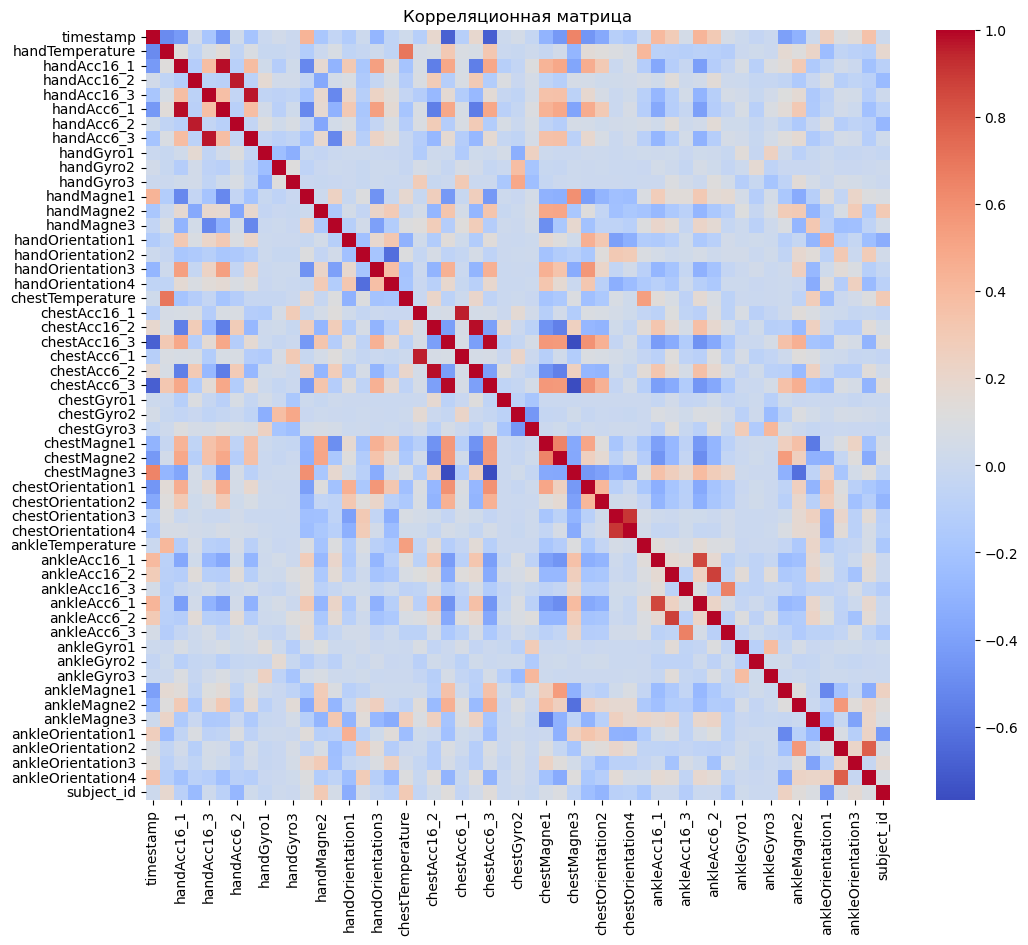

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

**Наблюдаем много коррелирующих признаков. Мультиколлинеарность не очень хорошее явление, поэтому из пары оставим только один признак**

In [6]:
multicol = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            multicol.append((feature_i, feature_j, correlation_value))

removed_features = set()
features_to_keep = set(df.columns)

for feature1, feature2, _ in multicol:
    if feature1 not in removed_features and feature2 not in removed_features:
        removed_features.add(feature2)

df_reduced = df.drop(columns=list(removed_features))

print("Удаленные признаки:", list(removed_features))
print("\nОставшиеся признаки:", df_reduced.columns.tolist())
print("\nИсходное количество признаков:", len(df.columns))
print("Количество признаков после заполнения:", len(df_reduced.columns))

Удаленные признаки: ['handAcc6_2', 'handAcc6_1', 'handAcc6_3', 'chestAcc6_1', 'chestAcc6_2', 'ankleAcc6_2', 'chestOrientation4', 'chestAcc6_3', 'ankleAcc6_1']

Оставшиеся признаки: ['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4', 'subject_id']

Исходное количество признаков: 53
Количество признаков после заполнения: 44


**Убрали мультиколлениарность. Чтобы ещё сократить количество признаков через метод главных компонент, нам необходимо заполнить пропуски**

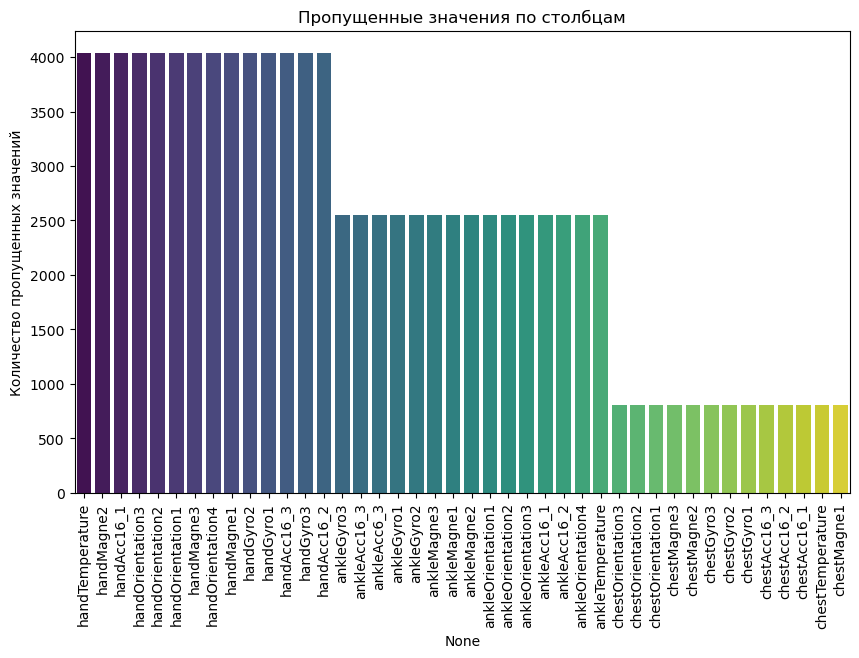

In [7]:
cnt_nan = df_reduced.isnull().sum()
cnt_nan = cnt_nan[cnt_nan > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cnt_nan.index, y=cnt_nan.values, hue=cnt_nan.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Пропущенные значения по столбцам')
plt.ylabel('Количество пропущенных значений')
plt.show()

**Заполним пропуски средним по группе**

In [8]:
df_without_nan = df_reduced.copy()

for column in df_without_nan.columns:
    if df[column].isnull().any():
        df_without_nan[column] = df_reduced.groupby('subject_id')[column].transform(lambda x: x.fillna(x.mean()))
        
df_without_nan = df_without_nan.drop(columns=['timestamp', 'subject_id'])

**Применим метод главных компонент и оставем только те столбцы, которые сохраняют 95% дисперсии, но для начала приведем признаки к одному масштабу**

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_nan)

pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(df_scaled)

print(f"Исходные признаки: {df_scaled.shape[1]}")
print(f"Компоненты после PCA: {x_pca.shape[1]}")
print(f"Объяснённая дисперсия: {round(sum(pca.explained_variance_ratio_), 2)}")

Исходные признаки: 42
Компоненты после PCA: 31
Объяснённая дисперсия: 0.95


**Попробуем методом локтя найти оптимальное число класстеров**

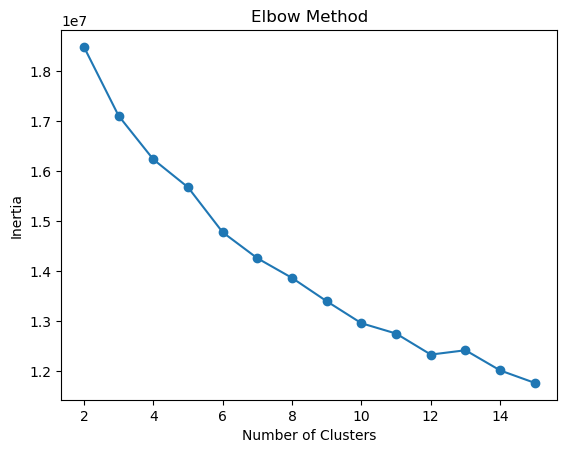

Оптимальное число кластеров (метод локтя): 3


In [14]:
# Метод локтя
inertia = []
k_values = range(2, 16)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Автоматическое определение точки перегиба
second_derivative = np.diff(inertia, n=2)
if len(second_derivative) > 0:
    optimal_k = k_values[np.argmax(second_derivative) + 1]
    print(f"Оптимальное число кластеров (метод локтя): {optimal_k}")
else:
    print("Не удалось определить точку перегиба")

In [ ]:
# Применение K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_without_nan['cluster'] = kmeans.fit_predict(x_pca)

In [12]:
# Преобразование номеров кластеров
df_without_nan['activityID'] = -1
unique_clusters = sorted(df_without_nan['cluster'].unique())
for new_label, old_label in enumerate(unique_clusters, start=1):
    df_without_nan.loc[df_without_nan['cluster'] == old_label, 'activityID'] = new_label

# Создание файла submission.csv
submission = df_without_nan[['activityID']].reset_index()
submission.columns = ['Index', 'activityID']
submission.to_csv('submission.csv', index=False)

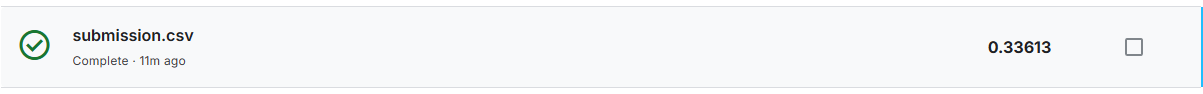